In [1]:
#k-means

In [7]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;

In [5]:
df = pd.read_csv('student_clustering.csv');
df.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


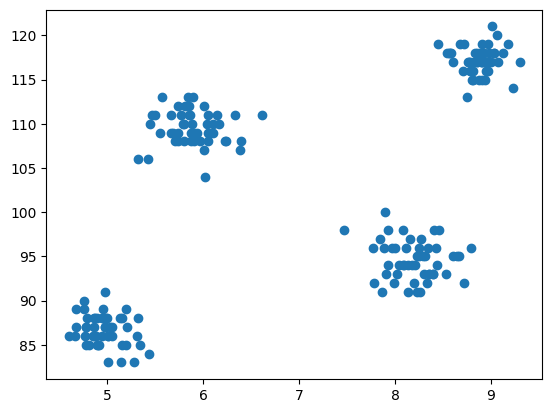

In [10]:
 # A scatter plot is like a visual snapshot of
#data points. It uses dots on a graph to represent values for two different variables.
plt.scatter(df['cgpa'],df['iq']);

In [11]:
from sklearn.cluster import KMeans ;


Initialize an empty list: wcss is an empty list that will store the Within-Cluster Sum of Squares (WCSS) values.

Loop over cluster numbers: A loop iterates from 1 to 10, creating KMeans models with different numbers of clusters (i).

Create a KMeans model: km is a KMeans model with the current cluster number (i).

Train the model: Fit the KMeans model to the data (df), creating clusters.

Calculate and store WCSS: Append the WCSS value (inertia) of the clustering to the wcss list.

In [19]:
wcss = []

for i in range(1,11):
  km = KMeans(n_clusters=i) # km is obeject of kmans , define the no. of clusters is i
  km.fit(df) # it will train the data
  wcss.append(km.inertia_) #

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [20]:
wcss

[29957.898288000004,
 4184.141270000001,
 2362.713349,
 681.9696600000003,
 514.1616803171116,
 388.85240268759804,
 302.5473746759042,
 233.54082485509014,
 208.08330910184586,
 173.07040109676714]

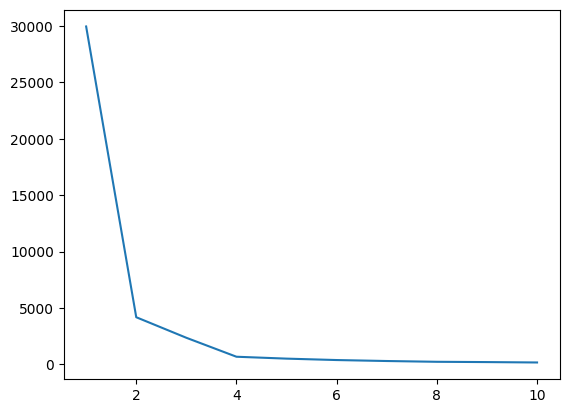

In [21]:
plt.plot(range(1,11),wcss)

4 is the elbow point , so number of clusters must be 4

In [43]:
X = df.iloc[:,:].values #  The [:,: ] part specifies that it's selecting all rows (: before the comma) and all columns (: after the comma). So, essentially, it creates a NumPy array (X) containing all the values from the DataFrame.
km = KMeans(n_clusters=4)
y_means = km.fit_predict(X) # train and cluster value it will give

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [41]:
y_means

array([2, 1, 0, 0, 1, 1, 0, 3, 1, 0, 2, 1, 0, 2, 1, 0, 1, 0, 1, 1, 0, 2,
       0, 2, 2, 0, 2, 3, 0, 1, 3, 1, 3, 1, 0, 0, 3, 1, 2, 1, 2, 0, 0, 2,
       3, 3, 0, 1, 3, 1, 2, 2, 3, 0, 3, 1, 1, 3, 1, 3, 1, 0, 0, 3, 2, 3,
       0, 2, 1, 0, 1, 3, 0, 2, 1, 3, 1, 3, 2, 0, 0, 3, 1, 2, 3, 2, 3, 1,
       3, 1, 3, 3, 0, 2, 0, 0, 3, 0, 2, 3, 1, 2, 2, 3, 2, 2, 0, 2, 3, 3,
       0, 3, 1, 1, 0, 3, 0, 1, 3, 2, 2, 1, 0, 3, 0, 2, 0, 1, 2, 0, 0, 1,
       2, 2, 1, 3, 1, 2, 0, 0, 0, 2, 1, 2, 2, 3, 2, 3, 1, 2, 3, 2, 3, 3,
       2, 0, 1, 3, 1, 0, 2, 3, 1, 0, 3, 2, 1, 2, 2, 3, 3, 1, 3, 2, 2, 0,
       3, 1, 2, 3, 3, 1, 1, 1, 0, 2, 0, 0, 3, 1, 0, 0, 2, 2, 0, 2, 3, 1,
       1, 3], dtype=int32)

In [44]:
X[y_means == 3,1]

array([115., 119., 117., 118., 118., 116., 116., 119., 116., 115., 115.,
       117., 118., 113., 116., 118., 117., 121., 116., 117., 117., 117.,
       114., 118., 118., 119., 118., 118., 117., 118., 117., 119., 118.,
       118., 117., 117., 117., 116., 118., 119., 117., 119., 120., 117.,
       115., 115., 117., 116., 118., 117.])

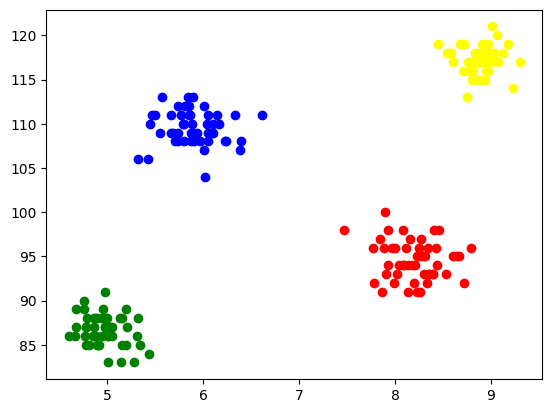

In [45]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='blue') # 0,0 means fisrt cluster first value
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='red')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')

In [ ]:
# from the above data we can see that , yellow colour student are weak in iq and cgpa ,
# and the red colour students are good in iq and cgpa

# Agglomerative Hierarchical Clustering

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt ;


In [47]:
customer_data = pd.read_csv('hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv')

In [48]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [52]:
X = customer_data.iloc[:,3:5].values # // it will extract the two last coloumns
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [53]:
import scipy.cluster.hierarchy as shc

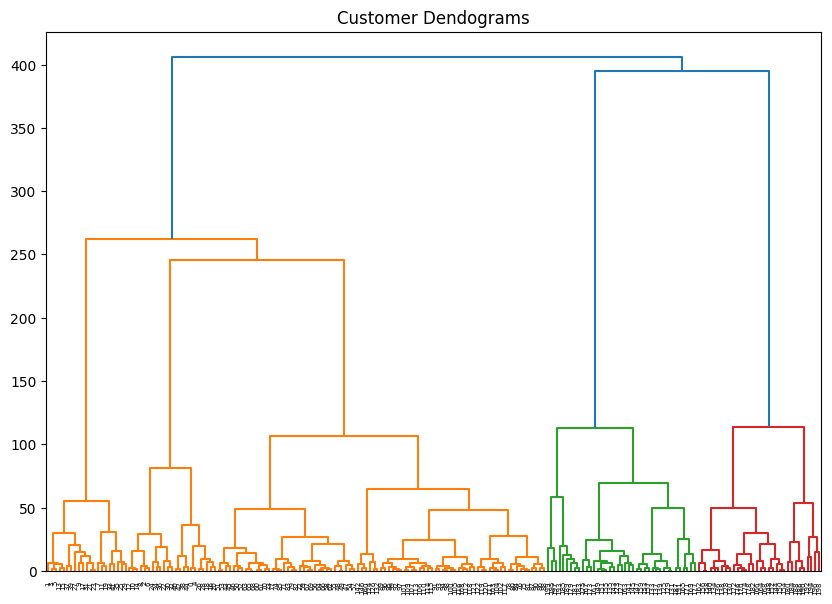

In [59]:
plt.figure(figsize=(10,7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(X, method='ward'))

In [61]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
labels_=cluster.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [62]:
labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

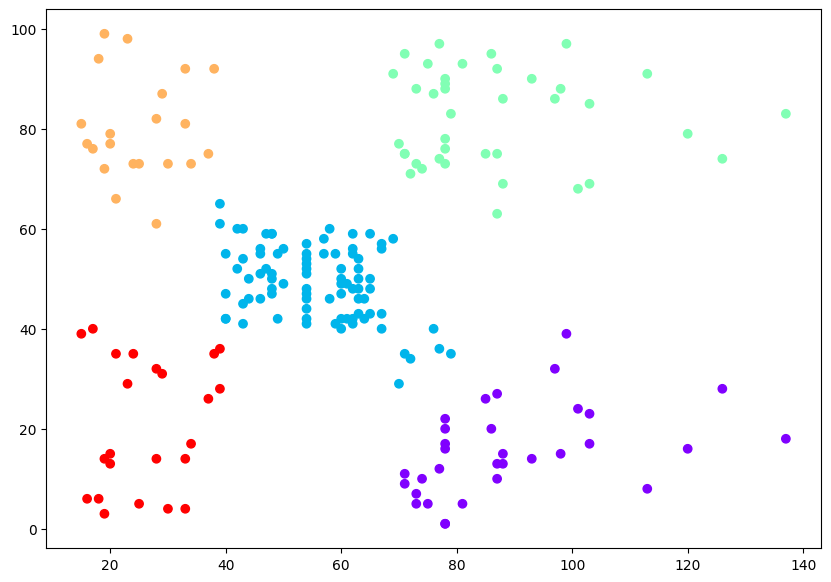

In [64]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow')